<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# WSR - WHI Create indicator
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/WSR/WHI_Create_indicator.ipynb" target="_parent"><img src="https://naasai-public.s3.eu-west-3.amazonaws.com/open_in_naas.svg"/></a>

**Tags:** #whi #indicators #opendata #worldsituationroom #analytics

**Author:** [Peter Turner](https://www.linkedin.com/in/peter-turner-0839aa116/)

## Input

In [1]:
%run common.ipynb

👌 Notebook common.ipynb loaded


### Import libraries

In [2]:
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
from datetime import date

### Variables

In [3]:
# Input extracted from your open source data
data = [
    {'DATE_PROCESSED': '2021-05-28', 'INDICATOR': 'COVID-19 Active Cases', 'VALUE': 0.21, 'WEIGHT': 4},
    {'DATE_PROCESSED': '2021-05-28', 'INDICATOR': 'Sea Level', 'VALUE': 4.951165245651996, 'WEIGHT': 2},
    {'DATE_PROCESSED': '2021-06-10', 'INDICATOR': 'Delta global temperature', 'VALUE': 4.9, 'WEIGHT': 4},
    {'DATE_PROCESSED': '2021-06-10', 'INDICATOR': 'Arctic Sea Ice level (million square km)', 'VALUE': 4.9, 'WEIGHT': 2}
]

# Outputs
uid = "WSR_00001"
name_output = "WHI_indicator"

In [ ]:
# naas.scheduler.add(cron="0 0 * * *")

## Model

### Get indicators

In [4]:
def get_indicators(data):
    df = pd.DataFrame(data)
    return df

df_indicators = get_indicators(data)
df_indicators

,DATE_PROCESSED,INDICATOR,VALUE,WEIGHT
0,2021-05-28,COVID-19 Active Cases,0.210000,4
1,2021-05-28,Sea Level,4.951165,2
2,2021-06-10,Delta global temperature,4.900000,4
3,2021-06-10,Arctic Sea Ice level (million square km),4.900000,2


### Calc WHI indicator

In [5]:
def calc_mark(df):
    return round((df['VALUE']*df['WEIGHT']).sum() / df['WEIGHT'].sum(), 2)

value = calc_mark(df_indicators)
value

3.35

### Create output image

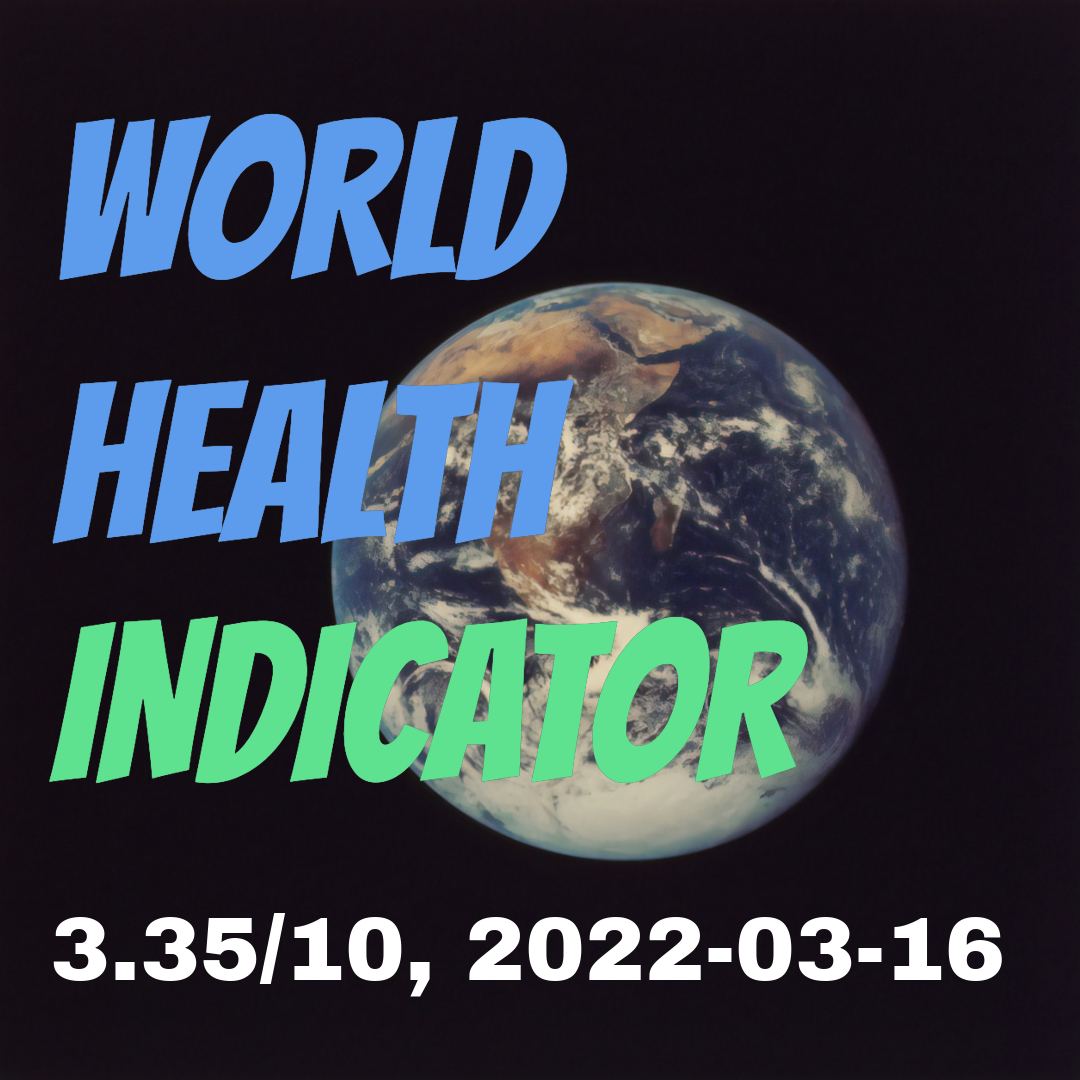

In [6]:
def create_image(value):
    img = Image.open(WHI_IMAGE_PATH)
    d = ImageDraw.Draw(img)
    
    font = ImageFont.truetype(FONT_PATH, 90)
    fill = (255,255,255)
    
    d.text((50,900), "{indicator}/10, {date}".format(date=datetime.now().strftime("%Y-%m-%d"), indicator=value), font=font, fill=fill)
    return img

img = create_image(value)
img

### Get sentiment

In [7]:
def get_sentiment(value):
    sentiment = None
    if value > 8:
        return 1
    elif value <= 8 and value > 3:
        return 0
    elif value <= 3:
        return -1
    return sentiment

sentiment = get_sentiment(value)
sentiment

0

## Output

### Save and share csv with naas

In [8]:
csv_link = save_output("dataframe-csv", name_output, df_indicators)
csv_link

💾 Dataframe successfully saved in csv ../output/WHI_indicator.csv
👌 Well done! Your Assets has been sent to production.



<IPython.core.display.Javascript object>

Button(button_style='primary', description='Copy URL', style=ButtonStyle())

Output()

PS: to remove the "Assets" feature, just replace .add by .delete


'https://public.naas.ai/d3NyLTQwbmFhcy0yRWFp/asset/fa48460474e194d7ca0cb04c3636f52f42eaeff24707ba8957cd26e60380'

### Save and share image with naas

In [9]:
image_link = save_output("image-png", name_output, img)
image_link

💾 Image successfully saved in png ../output/WHI_indicator.png
👌 Well done! Your Assets has been sent to production.



<IPython.core.display.Javascript object>

Button(button_style='primary', description='Copy URL', style=ButtonStyle())

Output()

PS: to remove the "Assets" feature, just replace .add by .delete


'https://public.naas.ai/d3NyLTQwbmFhcy0yRWFp/asset/9b3cad7d82cadfa84e568440e82dc6194698d29787bad113ba4007c2f843'

### Update Notion DB

In [10]:
update_report_status(uid, name_output=name_output, image_link=image_link, csv_link=csv_link, sentiment=sentiment)

✅ Page 'WSR_00001' updated in Notion. 🟠 WIP
